# Results

In [3]:
# Get Packages & Libraries
library(tidyverse)
library(rethinking)

In [30]:
# Get Data
df  <- read.csv("20210128_AM_Data-Letter.csv")

In [31]:
# View Data
glimpse(df)

Rows: 915
Columns: 57
$ X                       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…
$ docsequence             <int> 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3…
$ docid...2               <fct> S10003-D023, S10003-D024, S10003-D025, S10003…
$ docyear                 <int> 1836, 1836, 1837, 1837, 1838, 1838, 1838, 183…
$ doctype                 <fct> Letter, Letter, Letter, Letter, Letter, Lette…
$ allsubject              <fct> "Childbirth; Church attendance; Cities; Farms…
$ broadsubj               <fct> Health; Religion; Communities; Relationships;…
$ personalevent           <fct> NA, NA, NA, NA, NA, NA, NA, NA, Physical illn…
$ wwritten                <fct> "Baltimore, MD; Maryland; United States; Mid-…
$ docauthorid             <fct> per0022938, per0022938, per0022938, per002293…
$ docauthorname           <fct> "Bruns, Jette, 1813-1899", "Bruns, Jette, 181…
$ language                <fct> English; German, English; German, English; Ge…
$ editor                  <fct

## What sentiments and topics are evident in the letters?


### Sentiments

In [32]:
summary(df$SentimentLTR)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.39615  0.06321  0.15328  0.16264  0.24872  0.90003 

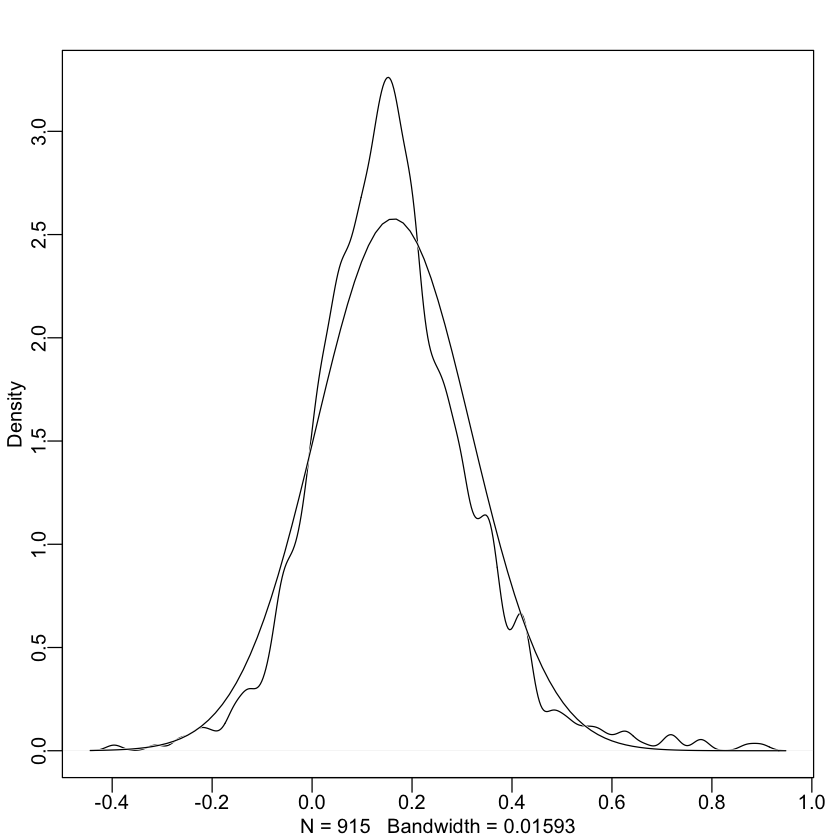

In [33]:
dens(df$SentimentLTR,norm.comp=TRUE)

In [34]:
sd(df$SentimentLTR)

[1] 0.1548296

$$sentimentLetter_i \sim Norm(\mu, \sigma)$$
$$\mu \sim Norm(0, .5)$$
$$\sigma \sim Unif(0, 50)$$

In [35]:
# Define them model
m1 <- alist(
    df$SentimentLTR ~ dnorm(mu,sigma),
    mu ~ dnorm(0,0.5),
    sigma ~ dunif(0,50)
)

In [43]:
fit_m1 <- map(m1,data=df)
precis(fit_m1, prob=.90)

      Mean StdDev 5.0% 95.0%
mu    0.16   0.01 0.15  0.17
sigma 0.15   0.00 0.15  0.16

Code below adapted from file:///Users/alaynemoody/Dropbox/SOCI620_Resources/20200310_PM_Code17.html

In [ ]:
# Get author IDs
authorIDs <- unique(df$docauthorid)

# subset df
df <- df[df$teacher_id %in% authorIDs,]
head(d)
dim(d)

In [10]:
#Create subset of repeat authors.
df %>% 
group_by(docauthorid) %>%
sample_n(1) %>%
pull(SentimentLTR) %>%
summary()

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.31304  0.01927  0.13643  0.13921  0.23371  0.66457 